In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from dateutil import parser

In [2]:
# Loading data in data frame
# EDA: Data sourcing
loan_df = pd.read_csv("loan.csv", header=0, low_memory=False)
print (loan_df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [3]:
loan_df.shape


(39717, 111)

In [4]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
# EDA: Data Cleaning
# Filtering columns which should be dropped from the dataset which have NA only
# Eg: Columns we got from the excel: AJ + AY onwards 
loan_df.dropna(how='all', axis='columns', inplace=True)        

In [6]:
loan_df.shape

(39717, 57)

In [7]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# columns_to_drop contains list of columns to be filtered - either they have same value or 
# don't contribute in analysis 
# member_id may not be useful but we are keeping it to have a record identifier
# The customer variables are not available at the time of loan processing and thats why excluding them
# funded_amnt is the amount which reviewer says but actual value is given by funded_amnt_inv which we have
# Hence we are dropping funded_amnt
columns_to_drop = [
                   'id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'addr_state', 
                   'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 
                   'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
                   'delinq_amnt', 'tax_liens','collection_recovery_fee', 'inq_last_6mths',
                   'pymnt_plan', 'sub_grade', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
                   'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
                    'last_credit_pull_d', 'funded_amnt' 
                  ]
loan_df.drop(columns_to_drop, axis = 1, inplace = True)

In [9]:
loan_df.shape

(39717, 19)

In [10]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [11]:
# Before doing any further analysis getting rid of records having loan_status as current
# we are removing this because this we can't predict the behaiour here.
loan_df = loan_df[loan_df.loan_status != "Current"]

In [12]:
loan_df.shape

(38577, 19)

In [13]:
# Now lets clean up/ modify few columns based on % missing data
missing_data = (loan_df.isna().sum()/len(loan_df.index))*100

cols_gt_60_percent = []
for k,v in missing_data.items():
    if v > 60:
        cols_gt_60_percent.append(k)

# mths_since_last_delinq     64.559193
# mths_since_last_record     92.897322
# next_pymnt_d              100.000000 < -- this is not given correctly by pandas lib
loan_df.drop(cols_gt_60_percent, axis = 1, inplace = True)

In [14]:
loan_df.shape

(38577, 16)

In [15]:
# Removing months word from term column
loan_df['term'] = list(map(lambda a:a.split(' ')[1], loan_df['term']))

In [16]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies
0,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,27.65,0.0
1,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,1.00,0.0
2,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,8.72,0.0
3,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,20.00,0.0
5,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,11.20,0.0


In [17]:
# Removing % from int_rate and converting result to a float
loan_df['int_rate'] = list(map(lambda a:float(a.split('%')[0]), loan_df['int_rate']))

In [18]:
# converting annual_inc and funded_amnt_inv to int as there are very few having float values
loan_df['annual_inc'] = list(map(lambda a:int(a), loan_df['annual_inc']))
loan_df['funded_amnt_inv'] = list(map(lambda a:int(a), loan_df['funded_amnt_inv']))

In [19]:
# Finding columns which needs to be filled properly 
loan_df.isna().sum() 

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [20]:
# Taking mode to fill na values for emp_length and pub_rec_bankruptcies
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace = True)
loan_df['emp_length']
loan_df['pub_rec_bankruptcies']

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38577, dtype: float64

In [21]:
# Here we see 9 bins are already proper only < 1 year and 10+ years needs to be corrected
# we are making < 1 year as 0 year and 10+ years as 10
loan_df['emp_length'] = loan_df['emp_length'].map(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [22]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,27.65,0.0
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,1.00,0.0
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,8.72,0.0
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,20.00,0.0
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852xx,11.20,0.0


In [23]:
# converting annual_inc to int as there are very few having float values
loan_df['annual_inc'] = list(map(lambda a:int(a), loan_df['annual_inc']))

In [24]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,27.65,0.0
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,1.00,0.0
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,8.72,0.0
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,20.00,0.0
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852xx,11.20,0.0


In [25]:
# EDA - Derived Metrics
# We should convert issue_d to datetime object and extract year and month
loan_df['issue_d'] = loan_df['issue_d'].map(lambda x: parser.parse(x))
loan_df['issue_d'] 

# <<Rahul commented this, since it was not working. Will rediscuss this one.>>
#loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%m-%Y')

0       2022-12-11
1       2022-12-11
2       2022-12-11
3       2022-12-11
5       2022-12-11
           ...    
39712   2022-07-07
39713   2022-07-07
39714   2022-07-07
39715   2022-07-07
39716   2022-06-07
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [26]:
loan_df['issue_d_year'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [27]:
loan_df['issue_d_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [28]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,2022-12-11,Fully Paid,credit_card,860xx,27.65,0.0,2022,12
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,2022-12-11,Charged Off,car,309xx,1.00,0.0,2022,12
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,2022-12-11,Fully Paid,small_business,606xx,8.72,0.0,2022,12
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,2022-12-11,Fully Paid,other,917xx,20.00,0.0,2022,12
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,2022-12-11,Fully Paid,wedding,852xx,11.20,0.0,2022,12


In [29]:
# Removing outliers for funded_amnt_inv column
# Basically those records whose funded_amnt_inv is 0 can not have any int_rate or 
# loan_status as Fully Paid or charged off. These are clearly wrongly entered data and hence outliers.
loan_df = loan_df[loan_df['funded_amnt_inv'] != 0]

In [30]:
loan_df.shape

(38427, 18)

<AxesSubplot:title={'center':'boxplot'}>

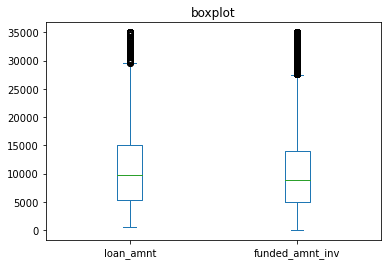

In [31]:
# EDA: Univariate Analysis
# A. Finding outliers in loan_amnt, funded_amnt_inv, annual_inc, int_rate, dti
# First checking outliers in loan_amnt and funded_amnt_inv as their ranges are similar
loan_df[['loan_amnt', 'funded_amnt_inv']].plot(kind='box', title='boxplot')

<AxesSubplot:title={'center':'boxplot'}>

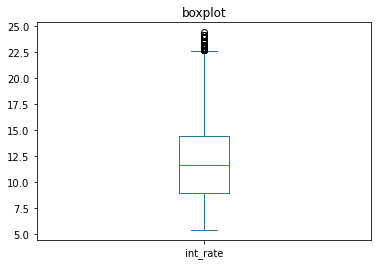

In [32]:
# Data looks fine for loan_amnt and funded_amnt_inv and doesn't seem to have outliers as
# data is continuously growing. So not doing anything for these.

# Now lests check for int_rate
loan_df[['int_rate']].plot(kind='box', title='boxplot')

<AxesSubplot:title={'center':'boxplot'}>

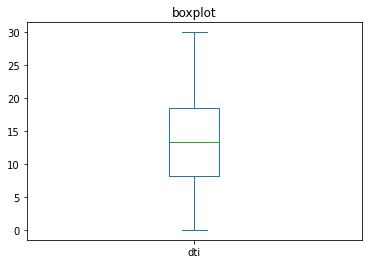

In [33]:
# Data looks fine for int_rate and doesn't seem to have outliers as
# data is continuously growing. So not doing anything for these.

# Now lets check for dti
loan_df[['dti']].plot(kind='box', title='boxplot')

<AxesSubplot:title={'center':'boxplot'}>

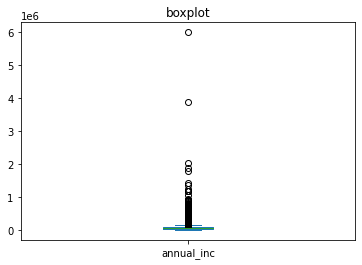

In [34]:
# Data looks fine for dti and doesn't seem to have outliers as
# data is continuously growing. So not doing anything for these.

# Now lets check for annual_inc
loan_df[['annual_inc']].plot(kind='box', title='boxplot')

In [35]:
# We could see clearly see outliers, lets find the range to drop
outlier_finder_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]
loan_df.annual_inc.quantile(outlier_finder_range)

0.00       4000.00
0.10      30000.00
0.20      37200.00
0.30      44680.00
0.40      50004.00
0.50      59000.00
0.60      65159.20
0.70      75000.00
0.80      90000.00
0.90     115172.40
0.91     120000.00
0.92     122004.00
0.93     127786.18
0.94     134609.12
0.95     140004.00
0.96     150000.00
0.97     165000.00
0.98     187000.00
0.99     234444.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [36]:
# We can clearly see that data after 95% or 0.95 is in range of outlier
outlier_quatile_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= outlier_quatile_annual_inc]

In [37]:
loan_df.shape

(36509, 18)

In [38]:
# We created the modified csv to analyze on smaller data
# loan_df.to_csv('modified_loan.csv', index = None, header=True)

In [39]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,2022-12-11,Fully Paid,credit_card,860xx,27.65,0.0,2022,12
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,2022-12-11,Charged Off,car,309xx,1.00,0.0,2022,12
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,2022-12-11,Fully Paid,small_business,606xx,8.72,0.0,2022,12
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,2022-12-11,Fully Paid,other,917xx,20.00,0.0,2022,12
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,2022-12-11,Fully Paid,wedding,852xx,11.20,0.0,2022,12


Text(0, 0.5, 'Count')

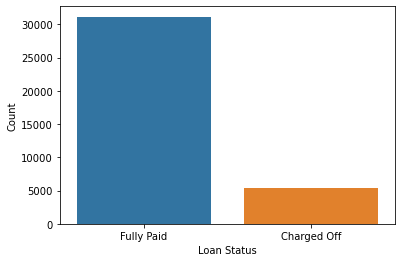

In [40]:
# EDA: Bivariate Analysis
# We will compare loan_status with rest of the features/columns to find the Defaulter pattern
# We have 2 status for loan_status : Charged Off and Fully Paid
# We will compare results of both Charged Off and Fully Paid to discover correct pattern
# else it may be possible that we may find a pattern for Charged Off that also exists for Fully Paid.

# Plotting to see split of loan_status viz. Fully paid vs Charged Off 
sns.countplot(x = 'loan_status', data = loan_df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
# this just shows Fully paid vs Charged Off split

In [66]:
def plt_frequency(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(data_df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

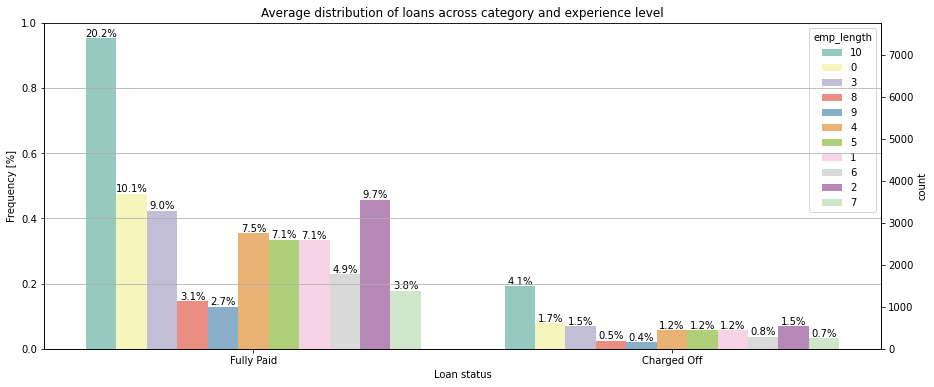

In [68]:
# Analyzing Loan Amount Group for charged off vs loan_status

loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], 
                              bins=8, precision=0, labels=['0-5000', '5001-10000', '10001-15000', 
                            '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35000-40000'])
#Afig, ax = plt.subplots(figsize =(12,8))
#ax.set(ylabel='Bar Count', xlabel='Loan Amount Group', title='Bar Count and Percent of Total Loan Status')
#sns.countplot(x='loan_amnt_groups', hue='loan_status', data=loan_df)
#plt.xlabel('Loan Amount Group')
#plt.ylabel('Bar count')
# From below plot we see if loan amount is in range of 5001 to 10000 then they have highest 
# probability to either Pay fully or become a Defaulter

plt_frequency("loan_status",loan_df,'Loan status','Average distribution of loans across category and experience level','emp_length')

Text(0, 0.5, 'Count')

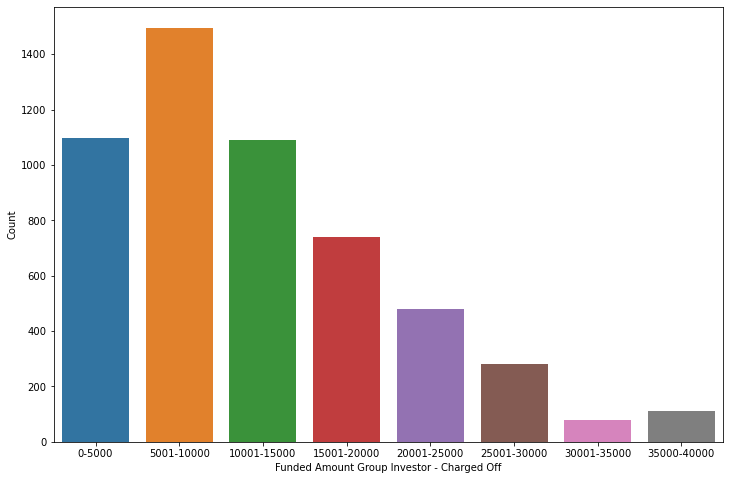

In [43]:
# Analyzing funded_amnt_inv for charged off

loan_df['funded_amnt_inv_groups'] = pd.cut(loan_df['funded_amnt_inv'], bins=8, precision =0, labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35000-40000'])
Afig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='funded_amnt_inv_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Funded Amount Group Investor - Charged Off')
plt.ylabel('Count')
# From below plot we can deduce that if funded_amnt_inv is in range of 5001 to 10000 they might become a defaulter.

Text(0, 0.5, 'Count')

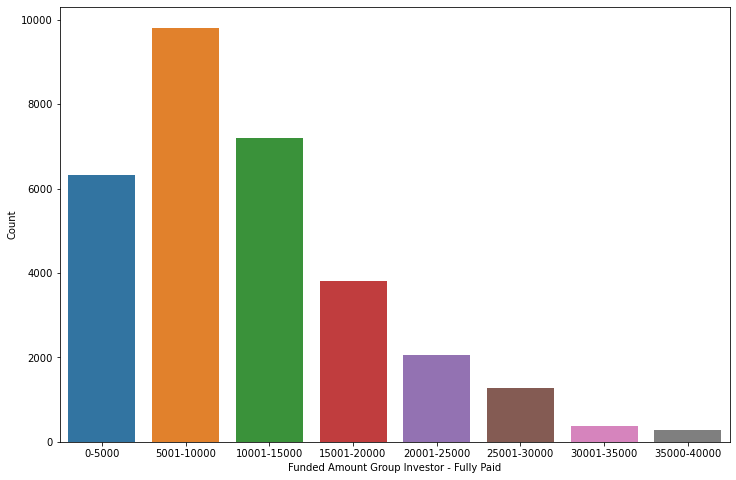

In [44]:
# Analyzing funded_amnt_inv for fully paid

loan_df['funded_amnt_inv_groups'] = pd.cut(loan_df['funded_amnt_inv'], bins=8, precision =0, labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35000-40000'])
Afig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='funded_amnt_inv_groups', data=loan_df[loan_df.loan_status == 'Fully Paid'])
plt.xlabel('Funded Amount Group Investor - Fully Paid')
plt.ylabel('Count')
# From below plot we can deduce that if funded_amnt_inv is in range of 5001 to 10000 they might become a defaulter.

Text(0, 0.5, 'Count')

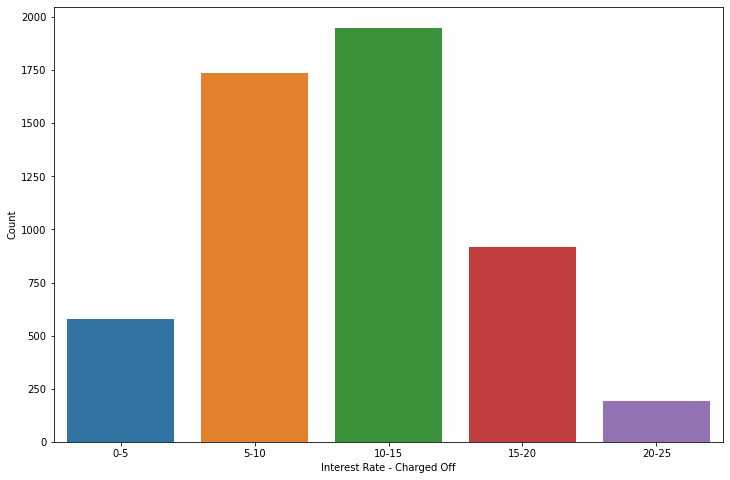

In [45]:
# Analyzing interest rate for charged off
loan_df['int_rate_group'] = pd.cut(loan_df['int_rate'], bins=5, precision =0, labels =["0-5", "5-10", "10-15", "15-20", "20-25"])
Afig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='int_rate_group', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate - Charged Off')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

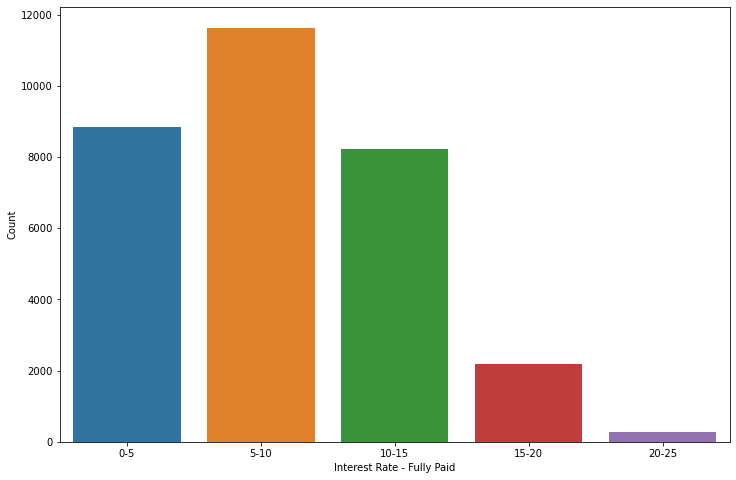

In [46]:
# Analyzing interest rate for fully paid
loan_df['int_rate_group'] = pd.cut(loan_df['int_rate'], bins=5, precision =0, labels =["0-5", "5-10", "10-15", "15-20", "20-25"])
Afig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='int_rate_group', data=loan_df[loan_df.loan_status == 'Fully Paid'])
plt.xlabel('Interest Rate - Fully Paid')
plt.ylabel('Count')
# From below plot we can deduce that if int_rate is in range of 5% to 10% they might become a defaulter.
#<<<<<Rahul- See diff in analysis>>>>>